<H2  ALIGN="CENTER"><B><FONT COLOR="#030856">
A simple model for crude oil production
</FONT></B></H2>

<TABLE ALIGN="LEFT" WIDTH="100%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
        <A HREF="./iogp_oil_graphic.jpg">
            <IMG SRC="./iogp_oil_graphic.jpg"></IMG></A> <BR></BR>
        <FONT COLOR="#A30856">
        Image courtesy of <A HREF="https://www.iogp.org">
        International Association of Oil &amp; Gas Producers.</A>
        &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
        </FONT>
    </TD>
    <TD ALIGN="LEFT">
<FONT SIZE="+0.5">
    
Over the past 100+ years the world has witnessed a dramatic 
increase in both the production and the consumption of oil.  During most of the 20th century (years 1900-2000) the production 
of crude oil was primarily from conventional sources, which 
typically involves drilling deep down into the earth's crust to 
extract oil from natural underground reserves.

<P>
In the early years of oil production, advances in the associated 
engineering processes and technology led to a rapid growth in 
the annual production rate.  The code below reads a data file and 
graphs the annual 
production of crude oil in the United States and in the 
world (in billions of barrels per year) for the period 1920-1999.
</P>
</FONT>
  </TR>
</TABLE>

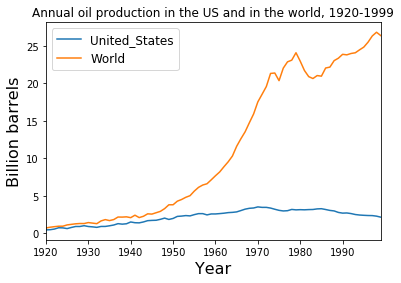

In [34]:
# This code reads oil production data from an iput file and 
# plots the results.

import matplotlib.pyplot as plt
import pandas as pd

# Our datafile is named: oil_prod_data.csv
# We read & plot the data using pandas & matplotlib, respectively
oildat = pd.read_csv("oil_prod_data.csv")
oildat.plot(x="Year")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Billion barrels", fontsize=16)
plt.legend(fontsize=12)
plt.title('Annual oil production in the US and in the world, 1920-1999',fontsize=12)
plt.show()

<P>
In spite of the rapid growth in oil production rates, 
later in the 20th century two others facts 
started becoming increasingly important:
    <OL>
        <LI>The worldwide demand for oil (and other energy sources) 
            continued to grow dramatically.</LI>
        <LI>The worldwide reserves of oil are believed to be 
            finite, and will be 
            exhausted some day.</LI>
    </OL>

Given these facts, some of the key questions scientists tried to address were:
    <UL>
        <LI>How much total recoverable crude oil remains on earth?</LI>
        <LI>What maximum rate of oil production per year can we expect, 
            and when will that occur?</LI>
    </UL>
    
Mathematical modeling was among the tools used to explore 
plausible answers to these questions.  One of the most famous 
explorations of this type, known as 
<A HREF="https://www.britannica.com/topic/peak-oil-theory">Hubbert’s 
peak oil theory</A>, was based on using a logistic model 
to fit the existing data.  Although Hubbert’s theory remains 
controversial and is not universally accepted, it was 
remarkably accurate in predicting (in the 1950s) that crude 
oil production in the United States would peak in the 1970s, at 
a rate of 2.5 to 3 billion barrels per year.  Hubbert also predicted
that worldwide crude oil production would peak in the 
year 2000.  It is not clear how accurate this 
prediction has been, because many new, non-conventional 
methods of oil production have been developed since 
the turn of the century.  In fact, oil production in the United States, 
after declining for 30 years, started increasing again around 
the year 2008, with significant new contributions coming from 
shale and other non-conventional sources.
</P>

<P>
In this module we explore math models to predict crude oil 
production rates similar to those used by Hubbert.  Let $t$ 
denote the number of years elapsed since 1920, and $x(t)$ 
the total quantity of crude oil produced in the 
United States (in thousand barrels) since the start of 
production.  In Hubbert’s peak oil theory, a logistic function 
of the following form is used to approximate the beheavior of $x$
$$
  x(t) = \frac{K}{1 + c e^{-rt}}
$$
where $K, c, r$ denote model parameters whose values must 
be determined using suitable methods.  Notice that 
$\lim_{t\rightarrow \infty} x(t)=K$, which means that $K$ 
essentially represents the grand total amount of 
recoverable oil in the U.S.  This is analogous to a sort 
of "carrying capacity," a term that is commonly used when 
modeling population dynamics using the logistic equation.

It is also useful to note that the derivative $dx/dt$ represents 
the quantity of oil produced per year, in units of thousand 
barrels per year.  Thus, its numerical values should 
reasonably approximate the actual production data shown in 
the graph above.
</P>

<H3><FONT COLOR="#030896">A first model</FONT></H3>

<P>
To recap our notation, $t$ 
denotes the number of years elapsed since 1920, $x(t)$ 
is a function representing the total quantity of crude oil 
produced in the US since the start of production.  We model it 
using the following 3-parameter algebraic equation
$$
  x(t) = \frac{K}{1 + c e^{-rt}}
$$
The modeling task that remains is to estimate reasonable values 
for the parameters $K, c$, and $r$.  Since we have 
80 years of data, a simple approach for doing that would be to find the 
logistic curve that best fits the data.  For the moment, we 
will ignore the question of what exactly we mean by "best fit," 
and what mathematical strategies are used for finding it.  
We will use Python functions to fit the model to the data.  
</P>


<P>
The name 
of the datafile is <TT>oil_prod_data.csv</TT>, and it 
contains 3 columns of data: (1) production year, (2) oil produced in 
the US, and (3) oil produced in the world.  The names of these 
variables are: <TT>Year, United_States, World</TT>.  The production figures 
are in billion barrels per year.  Although our data starts with the 
year 1920, recall that $x(t)$ denotes 
the cumulative amount of oil produced since the beginning of 
production.  Using historical data, we estimate $x(0)=5$ billion 
barrels for the United States ($t=0$ corresponds to the 
year 1920).
</P>

The code below computes the curve of best-fit for the United States, 
and later finds its derivative to estimate the annual production 
figures predicted by the model.  Please note the values of the model 
parameters and view the graphical displays.


Optimal parameter values are:

K= 216.27966081277984 , c= 29.60673749558976 , r= 0.06183045778858666


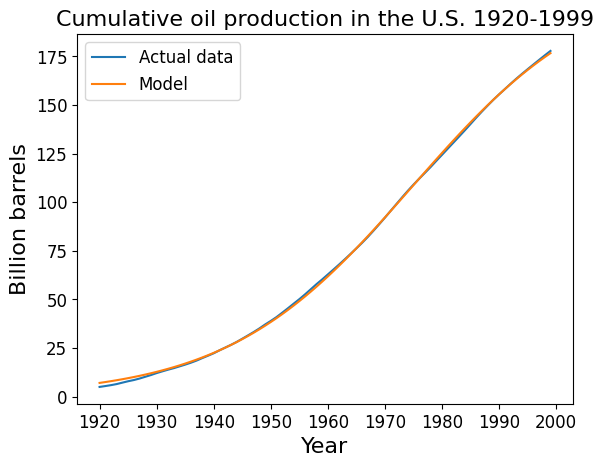

In [22]:
#%reset -f
# In this code-segment we find values of the 3 parameters K, c, r, 
# that produce the best-fit logistic curve.  Note that the curve 
# has the exact same form as that given in the description above.  
#
# Overall strategy:
#   (1) Define the 3-parameter logistic curve as a Python function.
#   (2) Read the CSV file containing the input data.
#   (3) Compute & store cumulative oil production in a new variable.
#   (4) Use the scipy function "curve_fit" to find K, c, r.
#   (5) Plot the results.
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


# Define the specific 3-parameter logistic fn I want:
def logistic3p(t, k, c, r):
    return k/(1.0 + c*np.exp(-r*t))


########## The main program starts here ##########

# Read csv data file and store in dataframe "oildat"
oildat = pd.read_csv("oil_prod_data.csv")
t = oildat['Year'] - 1920       # Subtract 1920, making t=0 correspond to year 1920
x = oildat['United_States']

# Create vector of total/cumulative oil production:
xcum = [0]*len(x)
xcum[0] = 5.0    # Initial condition says 5 billion barrels extracted by t=0
for i in range (1,len(x)):
    xcum[i] = xcum[i-1] + x[i-1]


# Set up initial guess for logistic model parameters:
p0 = [1, 0.5, 0.8]

# Use built-in function curve_fit to find optimal parameters:
oopt, ocov = curve_fit(logistic3p, t, xcum, p0)
print("\nOptimal parameter values are:\n")
print("K=", oopt[0], ", c=", oopt[1], ", r=", oopt[2])

# Compute vector of predicted results:
xp = [logistic3p(tp, oopt[0], oopt[1], oopt[2]) for tp in t]

# Plot results:
fig, ax = plt.subplots()
_ = ax.plot(t+1920,xcum, label="Actual data")
_ = ax.plot(t+1920,xp, label="Model")
_ = ax.legend(fontsize=12)
ax.set_title('Cumulative oil production in the U.S. 1920-1999', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Billion barrels', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

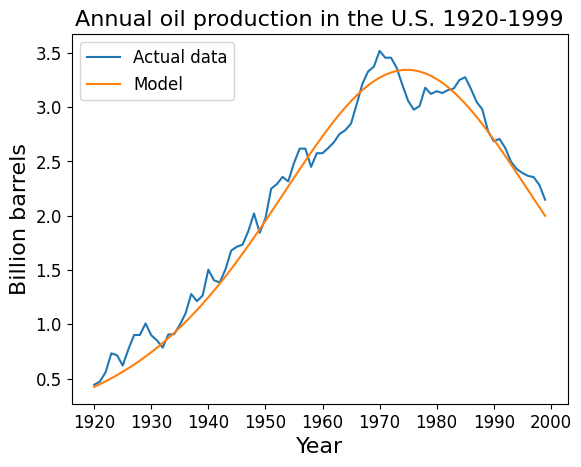

In [25]:
#
# This code-segment computes derivatives of the best-fit logistic 
# curve found above, and compares the result with the actual data.
#
# NOTE that the previous cell must be executed first, in order
# for the code below to run correctly.
#
# Strategy:
#   (1) Use "sympy" to define model & differentiate it in symbolic form.
#   (2) Use "numpy" to evaluate model & its derivatives numerically.
#

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

tmod = sp.Symbol('tmod') # declare "tmod" as a sympy variable
# Input the model parameter values:
k = oopt[0]
c = oopt[1]
r = oopt[2]

# Define logistic function in sympy syntax:
xmod = k/(1 + c*np.e**(-r*tmod))
f = sp.lambdify(tmod, xmod, "numpy")

# Compute vector of outputs predicted by the model:
yp = [f(tp) for tp in t]

# Compute derivative of logistic function & evaluate at all values of t:
dxmod = sp.diff(xmod, tmod)
df = sp.lambdify(tmod, dxmod, "numpy")
xout = [df(tp) for tp in t]

# Plot results & compare with actual production data:
fig, ax = plt.subplots()
_ = ax.plot(t+1920, x, label="Actual data")
_ = ax.plot(t+1920, xout, label="Model")
_ = ax.legend(fontsize=12)
ax.set_title('Annual oil production in the U.S. 1920-1999', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Billion barrels', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

<H3><FONT COLOR="#030896">A first model</FONT> &nbsp; (continued)</H3>

The parameters estimated for the curve of best fit are

$$
  K = 216.2797 \mbox{ billion barrels }, ~~ c = 29.6067, 
  ~~~~ r = 0.0618 \; / \mbox{ year }
$$

<P>
According to this model, the maximum amount of 
recoverable crude oil in the U.S. is about 217 billion barrels.  
And, the graphs show that the peak production occurs between
1970-1980, at about 3.2 billion barrels per year.  
</P>


<P>
<B>Some remarks:</B>
<UL>
    <LI>A valid 
criticism of this model's prediction about the peak would be 
that it has done little more than interpolate the pattern 
visible in the data itself.  In contrast, Hubbert’s  
peak oil prediction was made 20 years before the actual peak, 
using data only upto about 1950.  </LI>
    <LI>Some would argue that the estimate of 217 billion 
barrels for the maximum recoverable crude oil is too low.</LI>
    <LI>Estimates of model parameters are always associated 
with some uncertainty.  Therefore, it is useful to analyze  
how sensitive the model's predictions are to the parameter values.</LI>
</UL>
</P>

<P>
Some of these concerns can be addressed by analyzing graphs.  
For example, the effect of changing the values of the 
parameters on the model's predictions can be readily explored 
qualitatively.  In the following Python code we plot the 
annual production predicted by the model, and provide the 
user an interactive way to change the parameter values and 
observe the effect.
</P>

<P>
<B>Exercise</B>: Using graphical explorations, determine 
which parameter, if any, the model's predictions are strongly 
sensitive to.  The graphs produced by the code below provide 
sliders to set/change the parameter values.  Typically, we are 
interested in the effect of "small" changes, perhaps no more  
than $\pm 20$ to $30$%.  Observe any shifts in the location and 
magnitude of peak production.  Discuss your findings.
</P>

In [1]:
# This code produces an interactive plot of the logistic 
# model's prediction of annual oil production in the U.S. 
# The goal is to study the sensitivity of the model to its 
# parameter values.  The initial/default graph uses the 
# the best-fit parameter values estimated earlier.  Each 
# parameter can be independently and interactively varied 
# using the sliders provided.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
#from IPython.display import display

def interact_logistic3p():
    oildat = pd.read_csv("oil_prod_data.csv")
    t = oildat['Year'] - 1920
    x = oildat['United_States']
    k0, c0, r0 = 216.3, 29.6, 0.062
    x0 = [(k0*c0*r0*np.exp(-r0*tp))/(1.0 + c0*np.exp(-r0*tp))**2 for tp in t]
    
    fig = plt.figure(figsize=(8,3))
    plt.plot(t+1920, x, color='g', linestyle=':', linewidth=2, 
            label='actual data')
    plt.plot(t+1920, x0, color='r', linestyle='--', linewidth=1, 
             label='best-fit curve')
    line, = plt.plot([], [], linewidth=3, label='user defined parameters')
    plt.ylim(0,5)
    plt.xlabel('Year')
    plt.ylabel('Billion barrels')
    plt.title('Model for annual oil production in the U.S. 1920-1999')
    plt.legend(loc="upper left")
    plt.close()
    
    def plot_logistic3p(k, c, r):
        x = [(k*c*r*np.exp(-r*tp))/(1.0 + c*np.exp(-r*tp))**2 for tp in t]
        line.set_data(t+1920, x)
        display(fig)
    

    interact(plot_logistic3p, k=FloatSlider(min=150, max=350, step=2, value=216.3), 
        c=FloatSlider(min=25, max=35, step=0.5, value=29.6),
        r=FloatSlider(min=0.02, max=0.1, step=0.001, value=0.062))
    
interact_logistic3p();

interactive(children=(FloatSlider(value=216.3, description='k', max=350.0, min=150.0, step=2.0), FloatSlider(v…

<H3><FONT COLOR="#030896">A model for world oil production</FONT></H3>

<P>
As seen in a graph earlier, the annual 
rate of oil production in the world may have still been increasing in 
1999, the last year in our dataset.  Thus, we can try to 
fit a model to predict the year when the peak 
will occur, and at what 
rate of production.  The model will also give an estimate 
of the maximum amount of recoverable crude oil in the 
world.  The strategy and coding steps are very similar to 
those used earlier for analyzing United States oil production 
data.  We leave the implementation details as an exercise for 
the student.
</P>

<B>Exercise</B>: <BR></BR>
Use the data on world oil production contained in 
the file <TT>oil_prod_data.csv</TT> to carry out the following tasks.
<OL>
    <LI>
        Find the best fit 3-parameter logistic function of the form
$$
  x(t) = \frac{K}{1 + c e^{-rt}}
$$
for the cumulative oil production in the world.  We suggest letting 
$t=0$ correspond to the year 1920, and making some reasonable 
assumption about the value of $x(0)$, for example, 6-8 billion barrels.
Plot your results for both $x(t)$ and $x^\prime(t)$, as we did for 
the United States data.
    </LI>
    <LI><B></B>Discuss what your model suggests about when, and 
how much, the peak oil production will be.  What does the value 
of $K$ indicate?  Is the value reasonable?
    </LI>
    <LI>Find actual data for the world's oil production over the 
past 40 years and discuss how your model's predictions 
compare with reality.</LI>
    <LI>
        Carry out a graphical study of how sensitive your model's 
predictions are to the parameter values.  Discuss which parameter, 
if any, is critically important to estimate accurately.
    </LI>
</OL>